In [49]:
import pandas as pd


df = pd.read_csv('netflix.csv')

print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [50]:
#Pretratamiento de datos
#director has 2389 (30.7%) missing values	Missing
#cast has 718 (9.2%) missing values	Missing
#country has 507 (6.5%) missing values	Missing
#show_id has unique values	Unique
#title has unique values

df['director']=df['director'].fillna('Desconocido')

df['cast']=df['cast'].fillna('Desconocido/s')

df['country']=df['country'].fillna('Desconocido')


Se recomienda utilizar la siguiente paleta de colores aunque pueden utilizar otras:
['#f5f5f1', '#e50914', '#b20710', '#221f1f']

Los colores en la paleta personalizada custom_palette = ['#f5f5f1', '#e50914', '#b20710', '#221f1f'] son los siguientes:

#f5f5f1: Un color blanco muy claro, casi marfil. Este color es sutil y puede ser utilizado para elementos de fondo o detalles que no necesitan destacar mucho.

#e50914: Un rojo brillante y saturado, similar al rojo que usa Netflix en su branding. Es un color fuerte que capta la atención y puede usarse para elementos que necesiten resaltar.

#b20710: Un rojo oscuro, más profundo que el anterior. Este color también es intenso, pero tiene un tono más sobrio y elegante, lo que lo hace útil para destacar sin ser tan llamativo como el rojo brillante.

#221f1f: Un color negro con un tinte muy leve de marrón o gris oscuro. Es un color neutro y serio, excelente para contrastar con los colores más brillantes de la paleta.

Esta combinación de colores es poderosa y sofisticada, ideal para gráficos que buscan un diseño moderno, llamativo y con una estética visual fuerte.

C:\Users\marco\AppData\Local\Temp\ipykernel_22556\3116523097.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y='type', x='count',data=type_counts_sorted, palette=colors, edgecolor="black", orient='h')


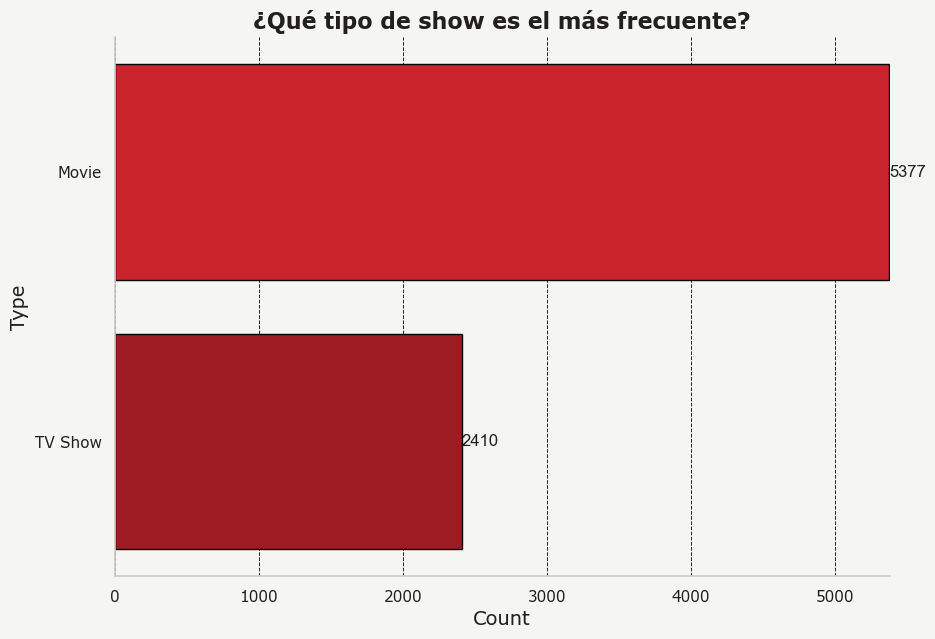

In [51]:
 #1. ¿Qué tipo de show es el más frecuente?

import matplotlib.pyplot as plt
import seaborn as sns

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Cambia 'Roboto' por el nombre de la fuente que hayas instalado


# Contar las ocurrencias y ordenar
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']
type_counts_sorted = type_counts.sort_values(by='count', ascending=False)

# Crear la paleta de colores para las barras
colors = [bright_red if i == 0 else dark_red for i in range(len(type_counts_sorted))]

# Configurar el fondo y las letras
plt.figure(figsize=(10, 7), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Crear el gráfico de barras horizontales
barplot = sns.barplot(y='type', x='count',data=type_counts_sorted, palette=colors, edgecolor="black", orient='h')

# Cambiar color de las letras
barplot.set_xlabel('Count', fontsize=14, color=text_color)
barplot.set_ylabel('Type', fontsize=14, color=text_color)
barplot.set_title('¿Qué tipo de show es el más frecuente?', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(type_counts_sorted['count']):
    plt.text(value + 1, index, f'{value}', va='center', fontsize=12, color=text_color)

# Añadir un margen al final de las barras
plt.xlim(0, type_counts_sorted['count'].max() + 5)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

# Mostrar el gráfico
plt.show()


C:\Users\marco\AppData\Local\Temp\ipykernel_22556\2772184982.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y='release_year', x='count', data=type_counts_sorted, palette=colors, edgecolor="black", orient='h')


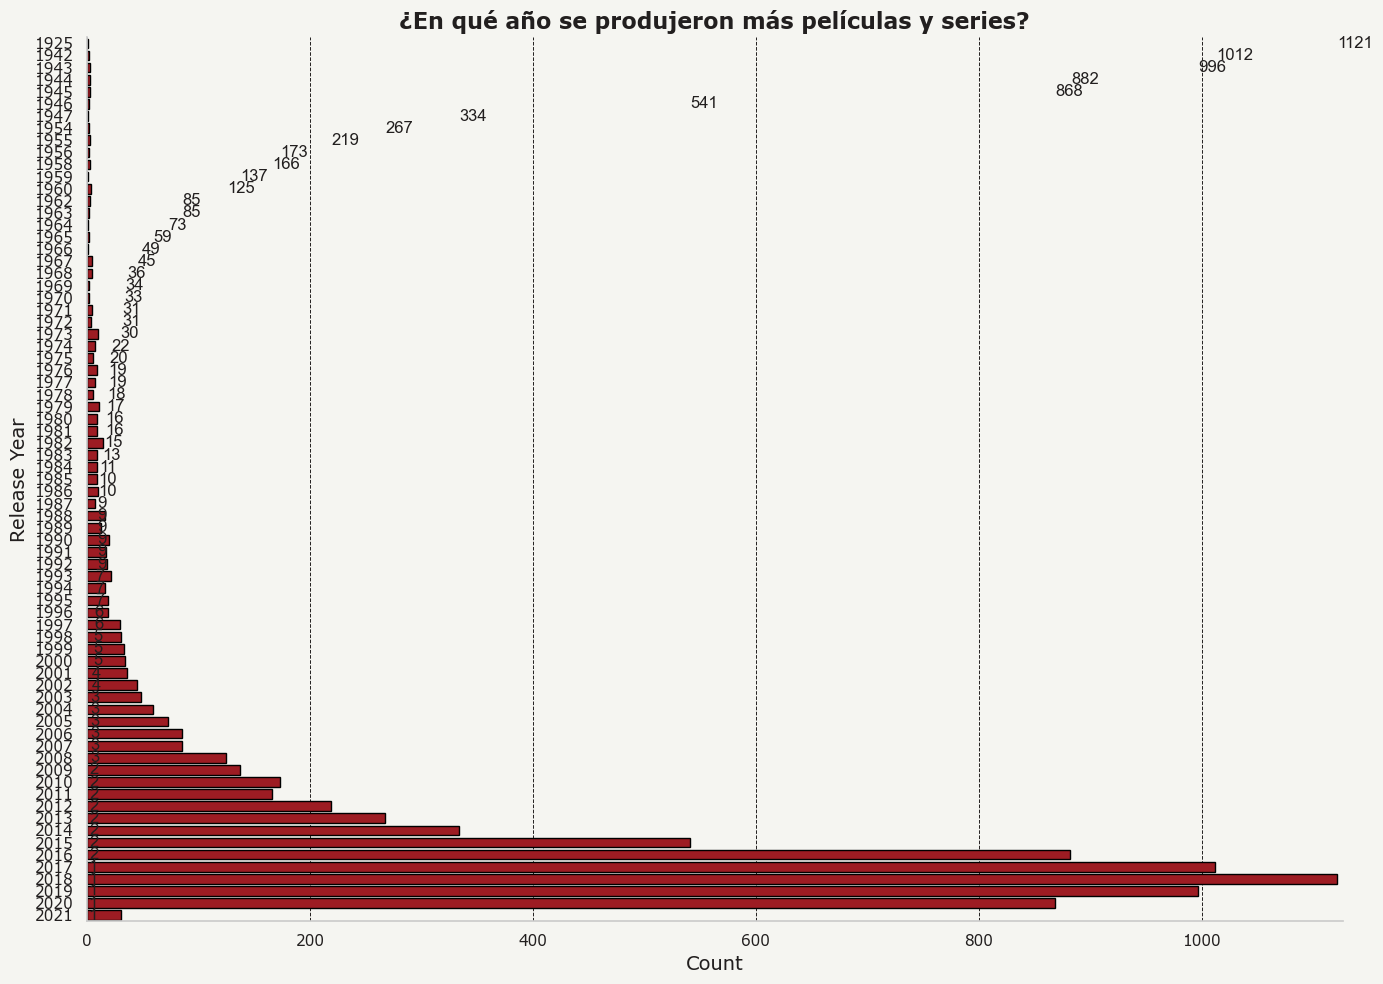

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Asegúrate de que esta fuente esté instalada

# Contar las ocurrencias y ordenar
type_counts = df['release_year'].value_counts().reset_index()
type_counts.columns = ['release_year', 'count']
type_counts_sorted = type_counts.sort_values(by='count', ascending=False)

# Crear la paleta de colores para las barras
colors = [bright_red if i == 0 else dark_red for i in range(len(type_counts_sorted))]

# Configurar el fondo y las letras
plt.figure(figsize=(14, 10), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Crear el gráfico de barras horizontales
barplot = sns.barplot(y='release_year', x='count', data=type_counts_sorted, palette=colors, edgecolor="black", orient='h')

# Cambiar color de las letras
barplot.set_xlabel('Count', fontsize=14, color=text_color)
barplot.set_ylabel('Release Year', fontsize=14, color=text_color)
barplot.set_title('¿En qué año se produjeron más películas y series?', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(type_counts_sorted['count']):
    plt.text(value + 0.5, index, f'{value}', va='center', fontsize=12, color=text_color, ha='left')

# Añadir un margen al final de las barras
plt.xlim(0, type_counts_sorted['count'].max() + 5)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones


# Mostrar el gráfico
plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_22556\2185593793.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y='country', x='count', data=country_counts_sorted, palette=colors, edgecolor="black", orient='h')


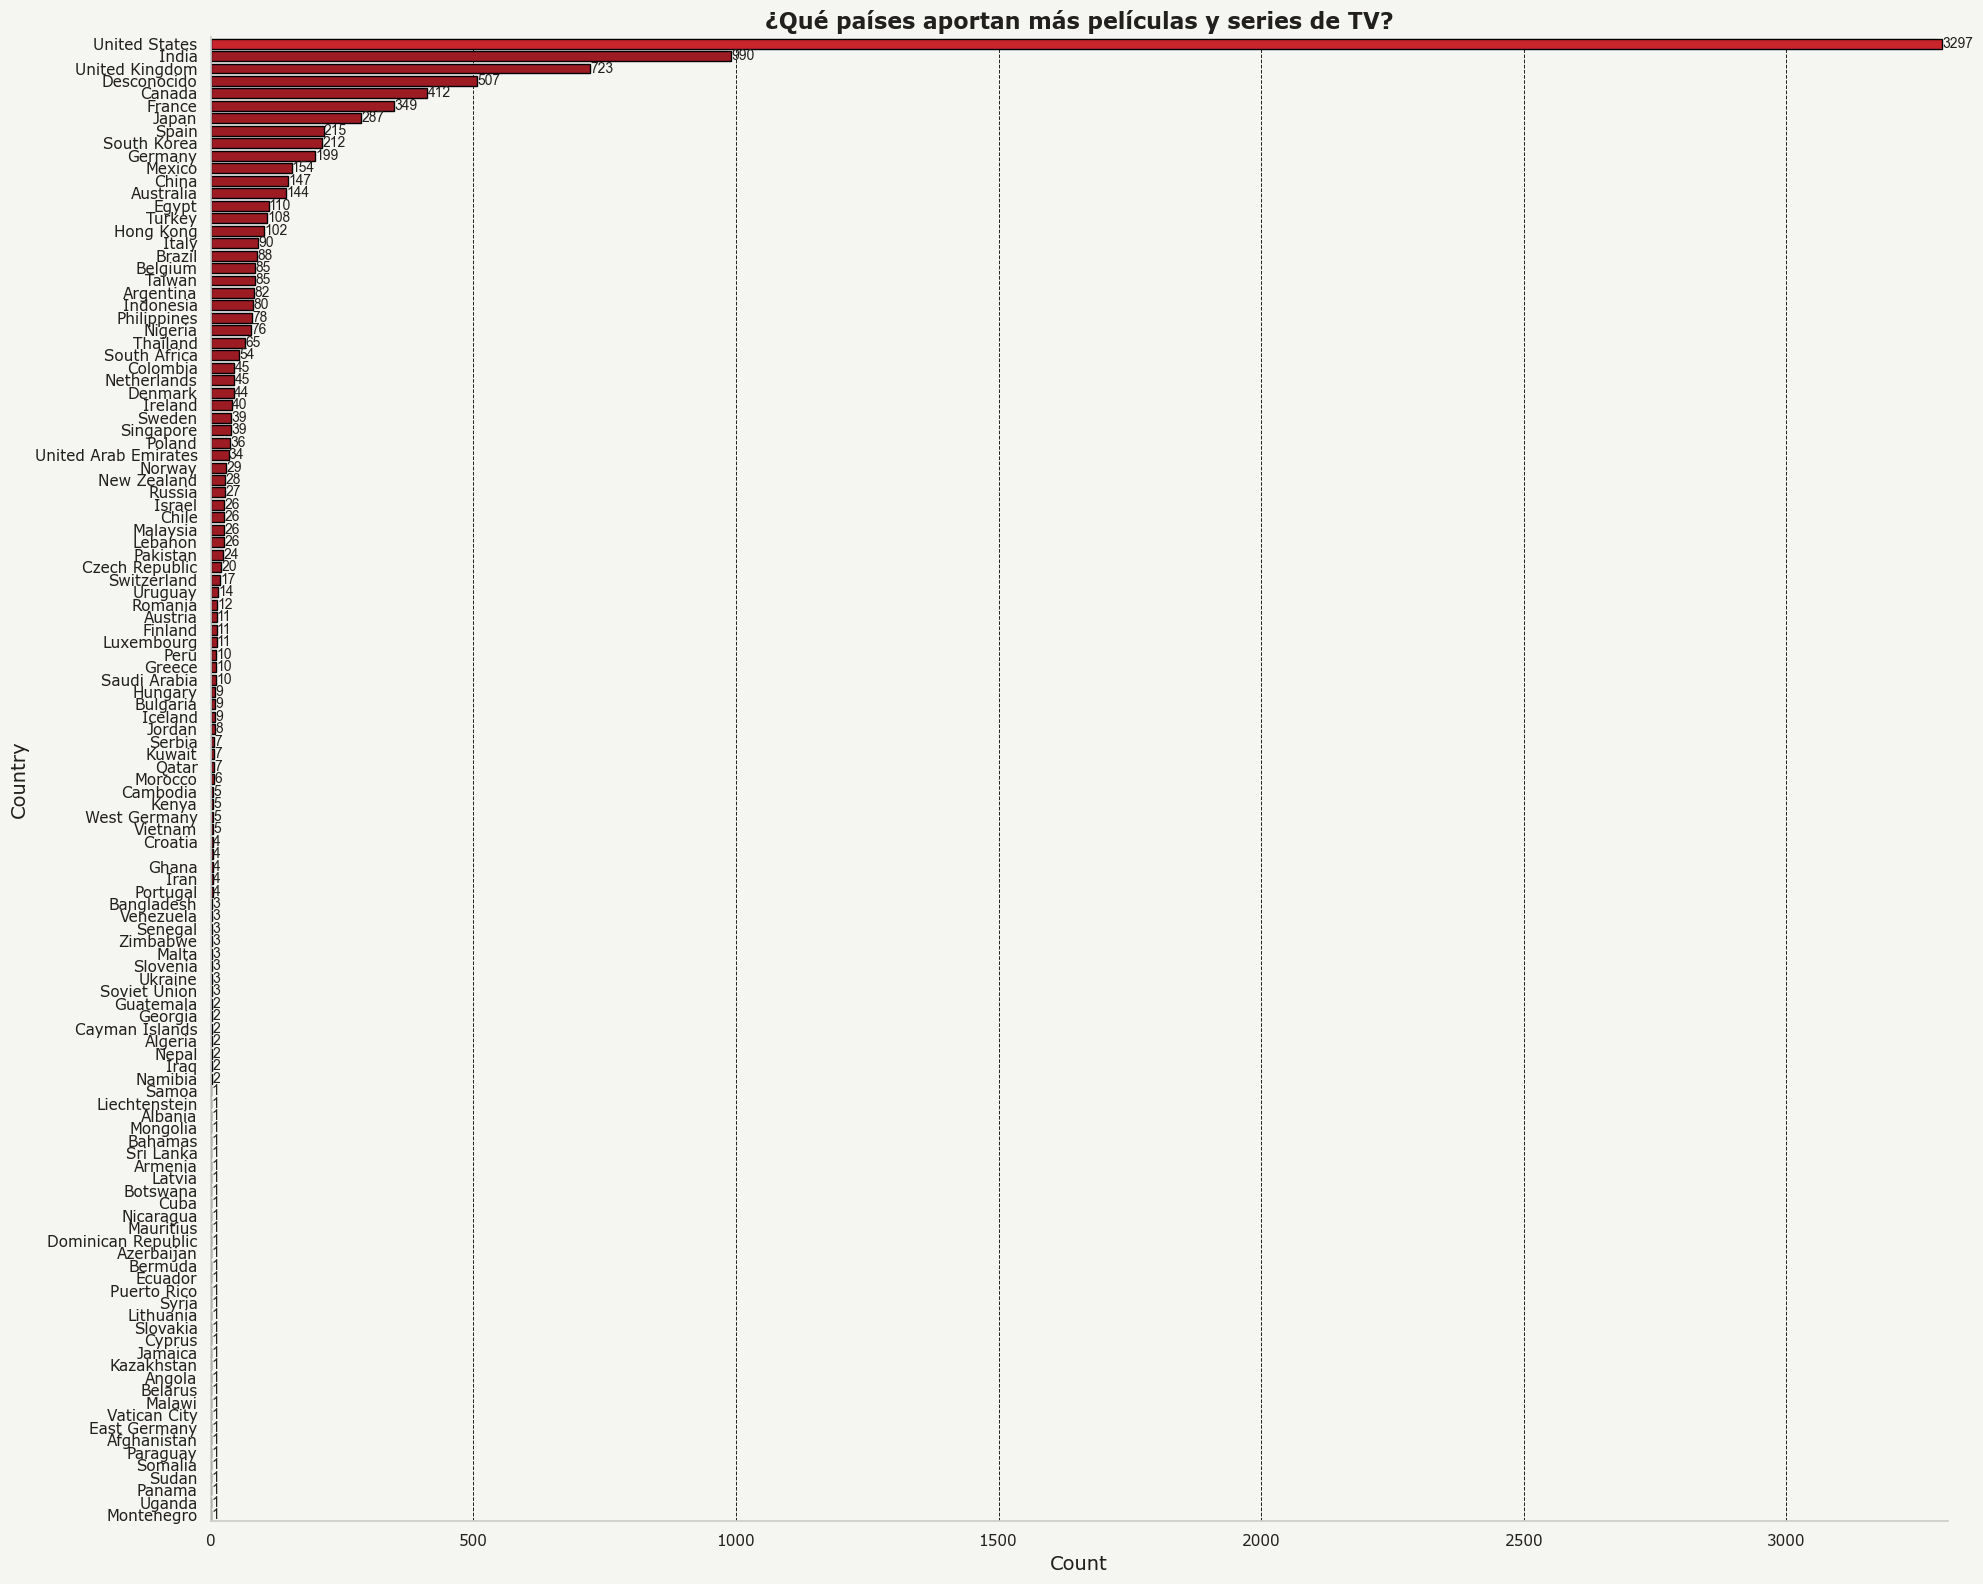

In [60]:
#3. ¿Qué países aportan más películas y series de TV?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Asegúrate de que esta fuente esté instalada

# Supongamos que df es tu DataFrame
# Aquí dividimos la columna 'country' en países individuales
df_expanded = df.assign(country=df['country'].str.split(',')).explode('country').reset_index(drop=True)

# Limpiar espacios alrededor de los nombres de los países
df_expanded['country'] = df_expanded['country'].str.strip()

# Contar las ocurrencias y ordenar
country_counts = df_expanded['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
country_counts_sorted = country_counts.sort_values(by='count', ascending=False)

# Crear la paleta de colores para las barras
colors = [bright_red if i == 0 else dark_red for i in range(len(country_counts_sorted))]

# Configurar el fondo y las letras
plt.figure(figsize=(20, 16), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Crear el gráfico de barras horizontales
barplot = sns.barplot(y='country', x='count', data=country_counts_sorted, palette=colors, edgecolor="black", orient='h')

# Cambiar color de las letras
barplot.set_xlabel('Count', fontsize=14, color=text_color)
barplot.set_ylabel('Country', fontsize=14, color=text_color)
barplot.set_title('¿Qué países aportan más películas y series de TV?', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(country_counts_sorted['count']):
    plt.text(value + 0.5, index, f'{value}', va='center', fontsize=10, color=text_color, ha='left')

# Ajustar márgenes
plt.xlim(0, country_counts_sorted['count'].max() + 10)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()



C:\Users\marco\AppData\Local\Temp\ipykernel_22556\2797180170.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y='country', x='count', data=country_counts_filtered_sorted, palette=colors, edgecolor="black", orient='h')


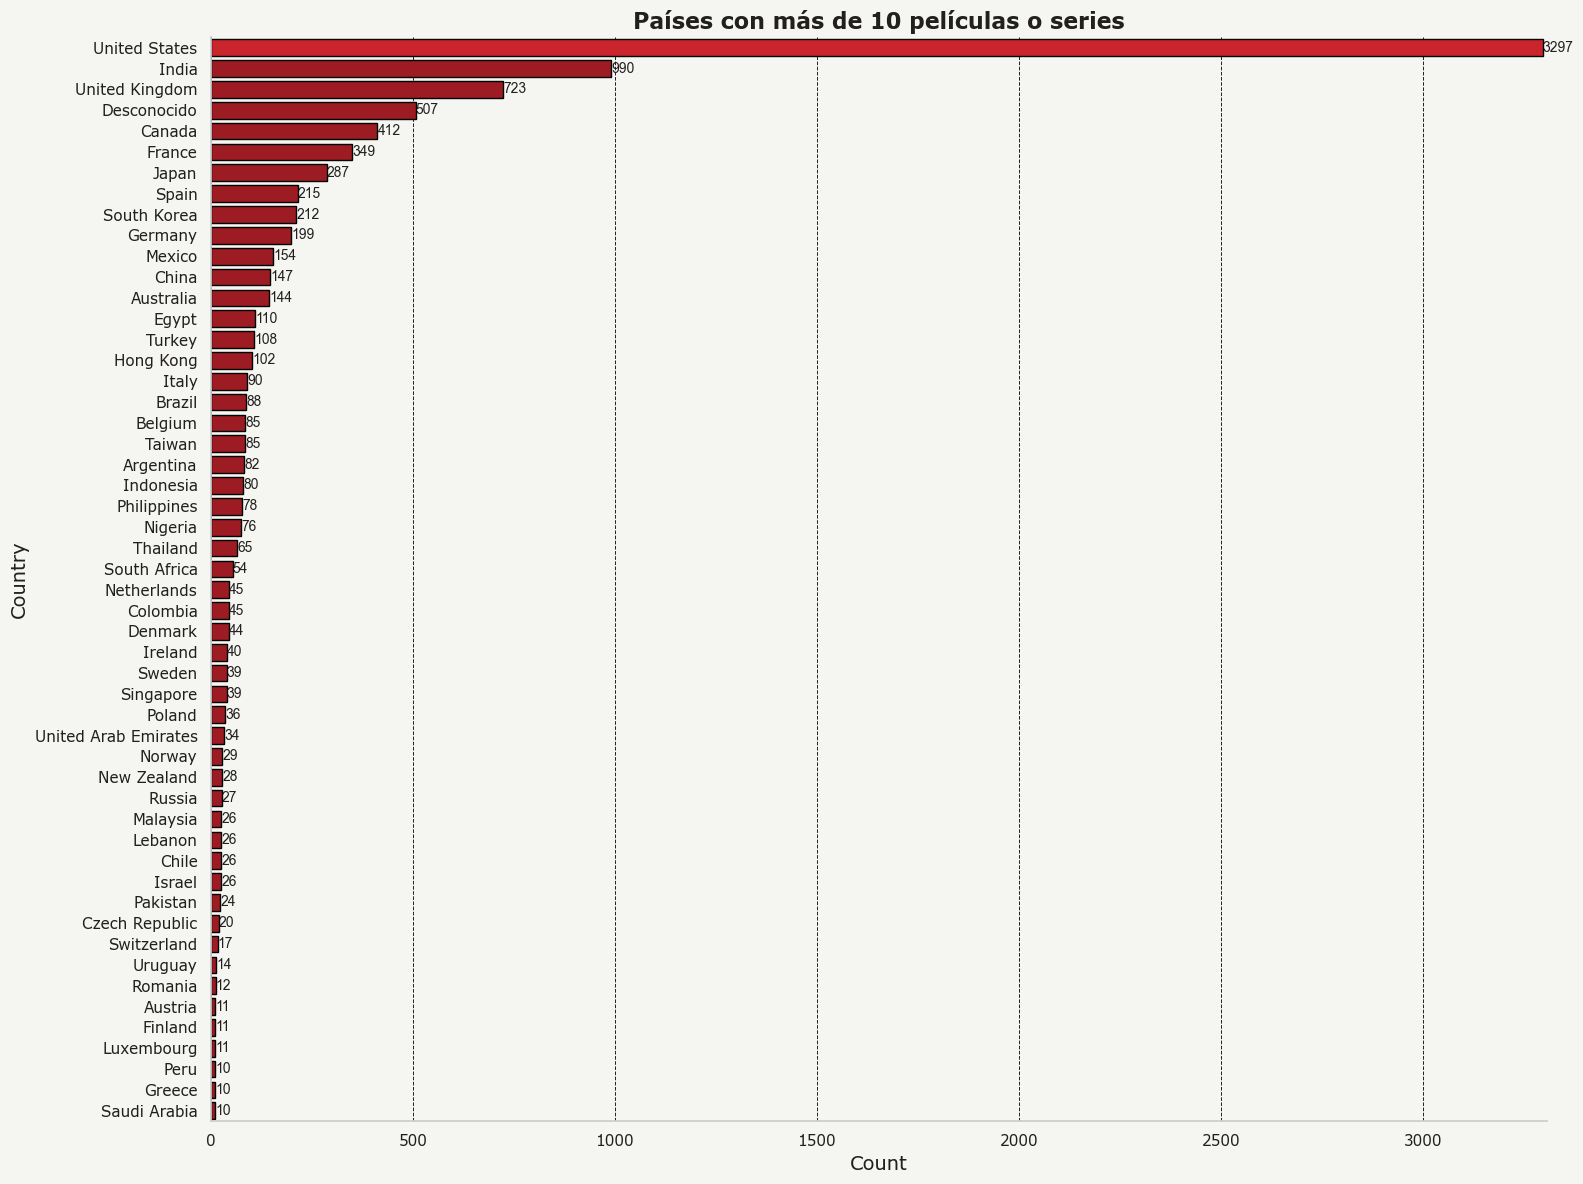

In [62]:
#Paises que hicieron mas de 10 peliculas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Asegúrate de que esta fuente esté instalada

# Supongamos que df es tu DataFrame
# Aquí dividimos la columna 'country' en países individuales
df_expanded = df.assign(country=df['country'].str.split(',')).explode('country').reset_index(drop=True)

# Limpiar espacios alrededor de los nombres de los países
df_expanded['country'] = df_expanded['country'].str.strip()

# Contar las ocurrencias y ordenar
country_counts = df_expanded['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Filtrar países con más de 10 películas
country_counts_filtered = country_counts[country_counts['count'] > 9]

# Ordenar por la cantidad de películas
country_counts_filtered_sorted = country_counts_filtered.sort_values(by='count', ascending=False)

# Crear la paleta de colores para las barras
colors = [bright_red if i == 0 else dark_red for i in range(len(country_counts_filtered_sorted))]

# Configurar el fondo y las letras
plt.figure(figsize=(16, 12), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Crear el gráfico de barras horizontales
barplot = sns.barplot(y='country', x='count', data=country_counts_filtered_sorted, palette=colors, edgecolor="black", orient='h')

# Cambiar color de las letras
barplot.set_xlabel('Count', fontsize=14, color=text_color)
barplot.set_ylabel('Country', fontsize=14, color=text_color)
barplot.set_title('Países con más de 10 películas o series', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(country_counts_filtered_sorted['count']):
    plt.text(value + 0.5, index, f'{value}', va='center', fontsize=10, color=text_color, ha='left')

# Ajustar márgenes
plt.xlim(0, country_counts_filtered_sorted['count'].max() + 10)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()


In [58]:
#4. ¿Cómo se distribuye la cantidad de series y películas segúnrating?

print(df['country'])

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                          Desconocido
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object


In [ ]:
#5. ¿Cómo se distribuye la audiencia objetivo (usar rating para esto)
#   según el origen de los shows?

In [ ]:
#6. ¿Cómo se distribuye la cantidad de series y películas según
#   cada mes? Varía la categoría (listed in) según el mes del año?

In [ ]:
#7. ¿Cuáles son los directores más populares?

In [ ]:
#8. ¿Cuáles son los actores más populares?

In [ ]:
#9. ¿Cómo se distribuye la duración en series y películas?

In [ ]:
#10. ¿Hay palabras que se utilicen más que otras en titulos y
#   descripciones?